In [51]:
## libraby
#!pip install beautifulsoup4 lxml requests pandas matplotlib numpy
#! pip install seaborn
#!pip install sqlite3

In [52]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Obtenir le site Web et extraire les données**

webpage = requests.get("...") : télécharge la page web à l’URL donnée et stocke la réponse HTTP (son contenu, son code de statut, etc.) dans la variable webpage.

soup = BeautifulSoup(webpage.content, "html.parser") : transforme le HTML brut de webpage en un objet BeautifulSoup pour pouvoir parcourir et extraire facilement des éléments de la page.

In [53]:

webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")


soup = BeautifulSoup(webpage.content, "html.parser")

Ici, nous utilisons la fonction **.find_all** sur la soup  variable que nous avons déclarée auparavant, cette soup  variable a le contenu du site Web, nous devons donc trouver ce dont nous avons besoin.


Dans le code, vous pouvez modifier "class"n'importe quelle balise HTML comme "id"et "class-name"n'importe quel nom de classe/id spécifique que vous souhaitez trouver.

In [54]:
#Stockez tout le texte en HTML avec la classe "Rating","CocoaPercent" et Company
rating_column = soup.find_all(attrs={"class": "Rating"})
cocoa_percent_tags = soup.find_all(attrs={"class": "CocoaPercent"})
company_column=soup.find_all(attrs={"class": "Company"})
origin_column=soup.find_all(attrs={"class": "Origin"})



In [55]:
#rating_column

In [56]:
#type(rating_column)

In [57]:
# importation et appel de fonction pour faire scrapping d'une page web
from scrapping.scrapping_cas_entete import Scrapping
url="https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"
colonnes={
    "Rating":{"class": "Rating"},
    "CocoaPercentage":{"class": "CocoaPercent"},
    "Company":{"class": "Company"},
    "Origine spécifique du harirot":{"class": "Origin"}
}
df=Scrapping.scrape_table(url,colonnes,skip_header=True)
if not df.empty:
    print(f"Données récupérées: {df.shape[0]} lignes, {df.shape[1]} colonnes")
    

Données récupérées: 1795 lignes, 4 colonnes


In [58]:
df.head(5)

,Rating,CocoaPercentage,Company,Origine spécifique du harirot
0,3.75,63%,A. Morin,Agua Grande
1,2.75,70%,A. Morin,Kpime
2,3,70%,A. Morin,Atsane
3,3.5,70%,A. Morin,Akata
4,3.5,70%,A. Morin,Quilla


In [59]:
# importation de la fonction déterminations de doublons
from data_exploration.doublons import Doublons

In [60]:
# appelle de la fonction
Doublons.valeur_double(df)

np.int64(0)

In [61]:
from data_exploration.valeur_manquante import ValeurManquante
ValeurManquante.calcul_valeur_manquante(df)

Rating                           0
CocoaPercentage                  0
Company                          0
Origine spécifique du harirot    0
dtype: int64

In [62]:
# détection des valeur abberante avec la fonction de calcul zscore
from anomalie.zscore import Zscore
Zscore.calcul_zscore(df)

""


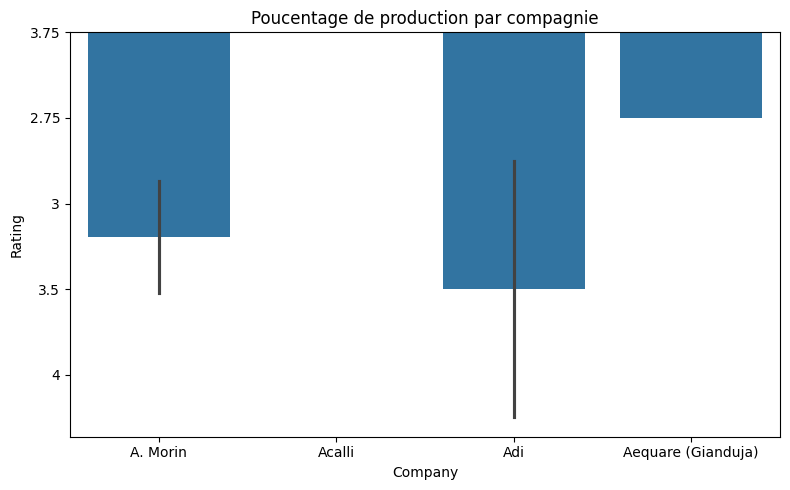

In [63]:
# Importation et appelle de la fonction pour visualiser les données
from visualisation.pyplot_seaborn import Visualisation
Visualisation.visualiser_donnees(df.head(30),x="Company",y="Rating",kind="bar",title="Poucentage de production par compagnie")

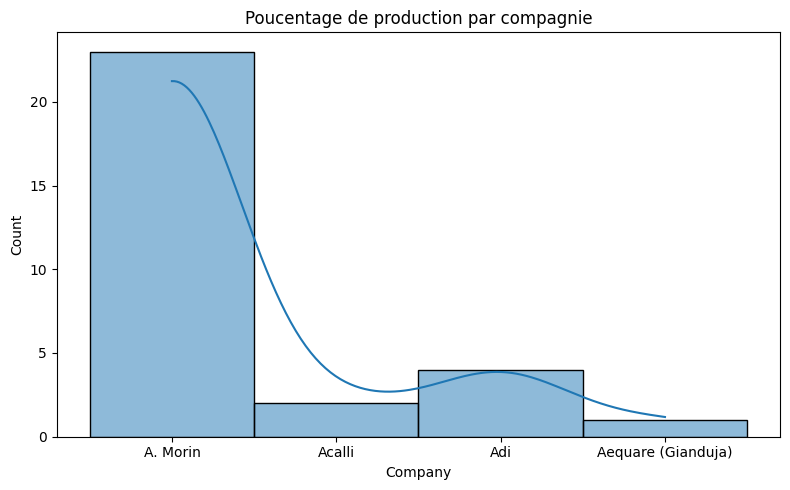

In [64]:
Visualisation.visualiser_donnees(df.head(30),x="Company",y="Rating",kind="hist",title="Poucentage de production par compagnie")

In [65]:
from load.exportation_csv import ExportationCsv
ExportationCsv.charger_csv(df,"resultat_scrapping.csv")

Données enregistrées dans resultat_scrapping.csv


In [66]:
from load.exportation_base_donnee import ExportationDB
ExportationDB.charger_sqlite(df,"resultat.db","cacao")

✅ Données enregistrées dans la table 'cacao' de resultat.db


In [67]:
#df.to_csv('/content/export/GfG.csv', index = True)
df.to_csv('donnee_recuperer.csv', index=False)

# **Méthodes utiles de BeautifulSoup**

# **A. Rechercher des éléments**


| Méthode                          | Ce qu’elle fait                                                                        |
| -------------------------------- | -------------------------------------------------------------------------------------- |
| `find(name, attrs, string)`      | Retourne **le premier** élément qui correspond (par nom de balise, attributs, texte).  |
| `find_all(name, attrs, string)`  | Retourne **tous** les éléments correspondants (liste). Alias : `findAll`.              |
| `select(css_selector)`           | Retourne les éléments qui matchent un **sélecteur CSS** (ex. `"table.data td.price"`). |
| `select_one(css_selector)`       | Retourne **le premier** élément qui match un sélecteur CSS.                            |
| `find_parent(name, attrs)`       | Premier **parent** qui matche.                                                         |
| `find_parents(name, attrs)`      | **Tous les parents** qui matchent.                                                     |
| `find_next(name, attrs)`         | Prochain élément **après** dans le flux qui matche.                                    |
| `find_all_next(name, attrs)`     | **Tous** les suivants qui matchent.                                                    |
| `find_previous(name, attrs)`     | Élément **avant** dans le flux qui matche.                                             |
| `find_all_previous(name, attrs)` | **Tous** les précédents qui matchent.                                                  |


**B. Naviguer dans l’arbre**

| Méthode/Attribut                          | Ce qu’elle fait                                                |
| ----------------------------------------- | -------------------------------------------------------------- |
| `tag.parent` / `tag.parents`              | Accéder au parent / itérer sur tous les parents.               |
| `tag.next_sibling` / `previous_sibling`   | Frère **suivant** / **précédent** immédiat.                    |
| `tag.next_siblings` / `previous_siblings` | Itérateurs sur **tous** les frères suivants/précédents.        |
| `tag.children` / `tag.descendants`        | Itérateurs sur **enfants directs** / **tous les descendants**. |
| `tag.contents`                            | **Liste** des enfants directs.                                 |
| `soup.title`, `soup.head`, `soup.body`    | Accès rapide au **premier** tag de ce type.                    |
